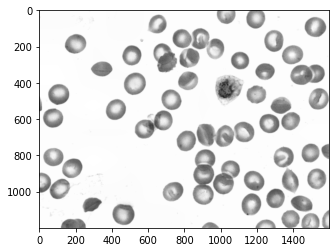

In [3]:
#Image Segmentation with Watershed Algorithm on Eritrocytes
import numpy as np
import cv2
from matplotlib import pyplot as plt

def display_image(image, cmap="gray"):
    return plt.imshow(image, cmap)

def read_image(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray

def ret_thresh(img):
    #return cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

img = read_image('images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = ret_thresh(img)
display_image(img)


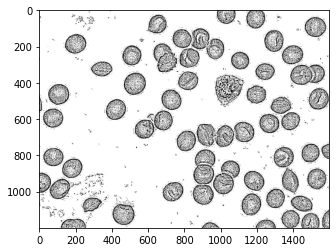

In [4]:
display_image(thresh)

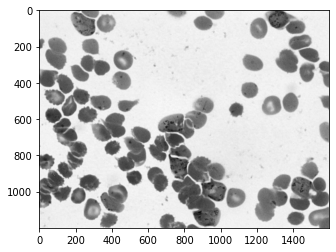

In [5]:

img_par = read_image('images/0dcbf2c9-f959-4703-a72b-f6a81e66c2ea.png')
thresh2 = ret_thresh(img_par)
display_image(img_par)


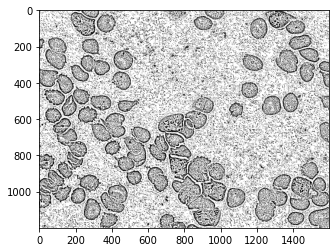

In [6]:
display_image(thresh2)

In [ ]:
circles = cv2.HoughCircles(thresh2,cv2.HOUGH_GRADIENT,1,10,param1=50,param2=30,minRadius=0,maxRadius=10)
circles = np.uint16(np.round(circles))
for i in circles[0,:]:
    cv2.circle(thresh2, (i[0],i[1]),i[2],(0,255,0),2)
display_image(thresh2)
#display_image(circles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import io
from skimage.color import rgb2gray

def read_image2(path):
    return io.imread(path)

def display_image2(image, cmap="gray"):
    return plt.imshow(image, cmap)


img2 = read_image2('images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
gray = rgb2gray(img2)
plt.imshow(gray, cmap='gray')
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')